In [4]:
# Indexing
from os import listdir
from os.path import isfile, join
import sys
import warnings
warnings.filterwarnings('ignore')

from elasticsearch import Elasticsearch
from image_match.elasticsearch_driver import SignatureES


es = Elasticsearch()
es.indices.delete(index='calcenter', ignore=[400, 404])
ses = SignatureES(es, index='calcenter')

files = [file for file in listdir('images') if isfile(join('images', file))]

for f in files:
    file_path = os.path.abspath('images/'+f)
    try:
        ses.add_image(file_path)
    except:
        print("Erro no arquivo: " + file_path)
        continue


Erro no arquivo: /Users/rodrigolima82/Dropbox/DataScience/AMcom/Calcenter/Image_Recognition/images/.DS_Store


Procurando: images/5114954_MARIPINK.jpg


<Figure size 432x288 with 0 Axes>

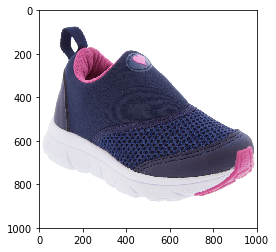

In [5]:
# Making a target image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.tight_layout()

file_path = 'images/5114954_MARIPINK.jpg'
print('Procurando: '+file_path)
imageTarget = Image.open(file_path, 'r')
plt.figure()
plt.imshow(np.asarray(imageTarget))


Quantidade de imagens similares encontradas:14
Imagem: 5114954_MARIPINK.jpg
Dist: 0.0
Score: 63.0


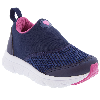

Imagem: 5132346_GRAFITE.jpg
Dist: 0.41735113941022817
Score: 4.0


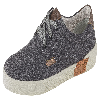

Imagem: 5131269_VERANO.jpg
Dist: 0.4192688105548168
Score: 6.0


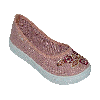

Imagem: 5132949_PRETO.jpg
Dist: 0.42079462485706104
Score: 7.0


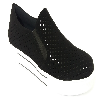

Imagem: 5132815_CARAMELO.jpg
Dist: 0.42517191198965165
Score: 7.0


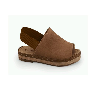

Imagem: 5132237_PRETO.jpg
Dist: 0.42656445446473884
Score: 7.0


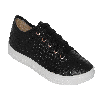

Imagem: 5133039_PRETO.jpg
Dist: 0.4335334448120403
Score: 4.0


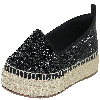

Imagem: 5132816_PRETO.jpg
Dist: 0.43590577292333677
Score: 6.0


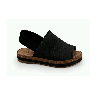

Imagem: 5132675_MARINHO.jpg
Dist: 0.4379229857194592
Score: 5.0


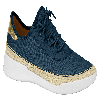

Imagem: 5132344_AZUL.jpg
Dist: 0.44161236649109864
Score: 10.0


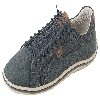

Imagem: 5132774_AZUL PRAT.jpg
Dist: 0.4428965340133388
Score: 9.0


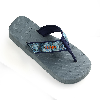

Imagem: 5132361_PRETO.png
Dist: 0.4438613365574675
Score: 9.0


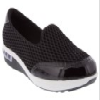

Imagem: 5129678_SMOKETABACO.jpg
Dist: 0.4439621924071152
Score: 4.0


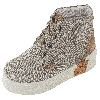

Imagem: 5132622_PRETO.jpg
Dist: 0.447904885279272
Score: 8.0


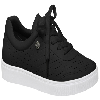

In [6]:
# Searching for other images
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings('ignore')

es = Elasticsearch()
ses = SignatureES(es, index='calcenter')

result = ses.search_image(file_path, all_orientations=True)
print("Quantidade de imagens similares encontradas:" + str(len(result)))

for i in result:    
    path  = i["path"]
    dist  = i["dist"]
    score = i["score"]
    
    print("Imagem: " + path[82:])
    print("Dist: " + str(dist))
    print("Score: " + str(score))
    print("=============================")

    imageCompare = Image.open(path, 'r')
    imageCompare = imageCompare.resize((100, 100))
    display(imageCompare)
    
    #plt.figure(figsize = (20,2))
    #plt.clf()
    #plt.imshow(np.asarray(imageCompare))